#**Machine Learning Model to Identify the Iris Flower Species**

#**Data Science Intership Task 1 of Oasis Infobyte**

Name : Areesha Kaleem                  

 Institute: University of Engineering and Technology, Lahore

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#libraries for model trainig and predictions
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#load dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\Data science Intership-Oasis Infobyte\Iris.csv',encoding = 'unicode_escape')

#**Data Preprocessing**

In [5]:
#(col,row)
df.shape

(150, 6)

In [6]:
#Dataset in Tabular form
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#column names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#evaluating mean, median and other numerical parameters
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
pd.isnull(df).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#Dividing data inorder to train and predict
X = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
W = df['Species']

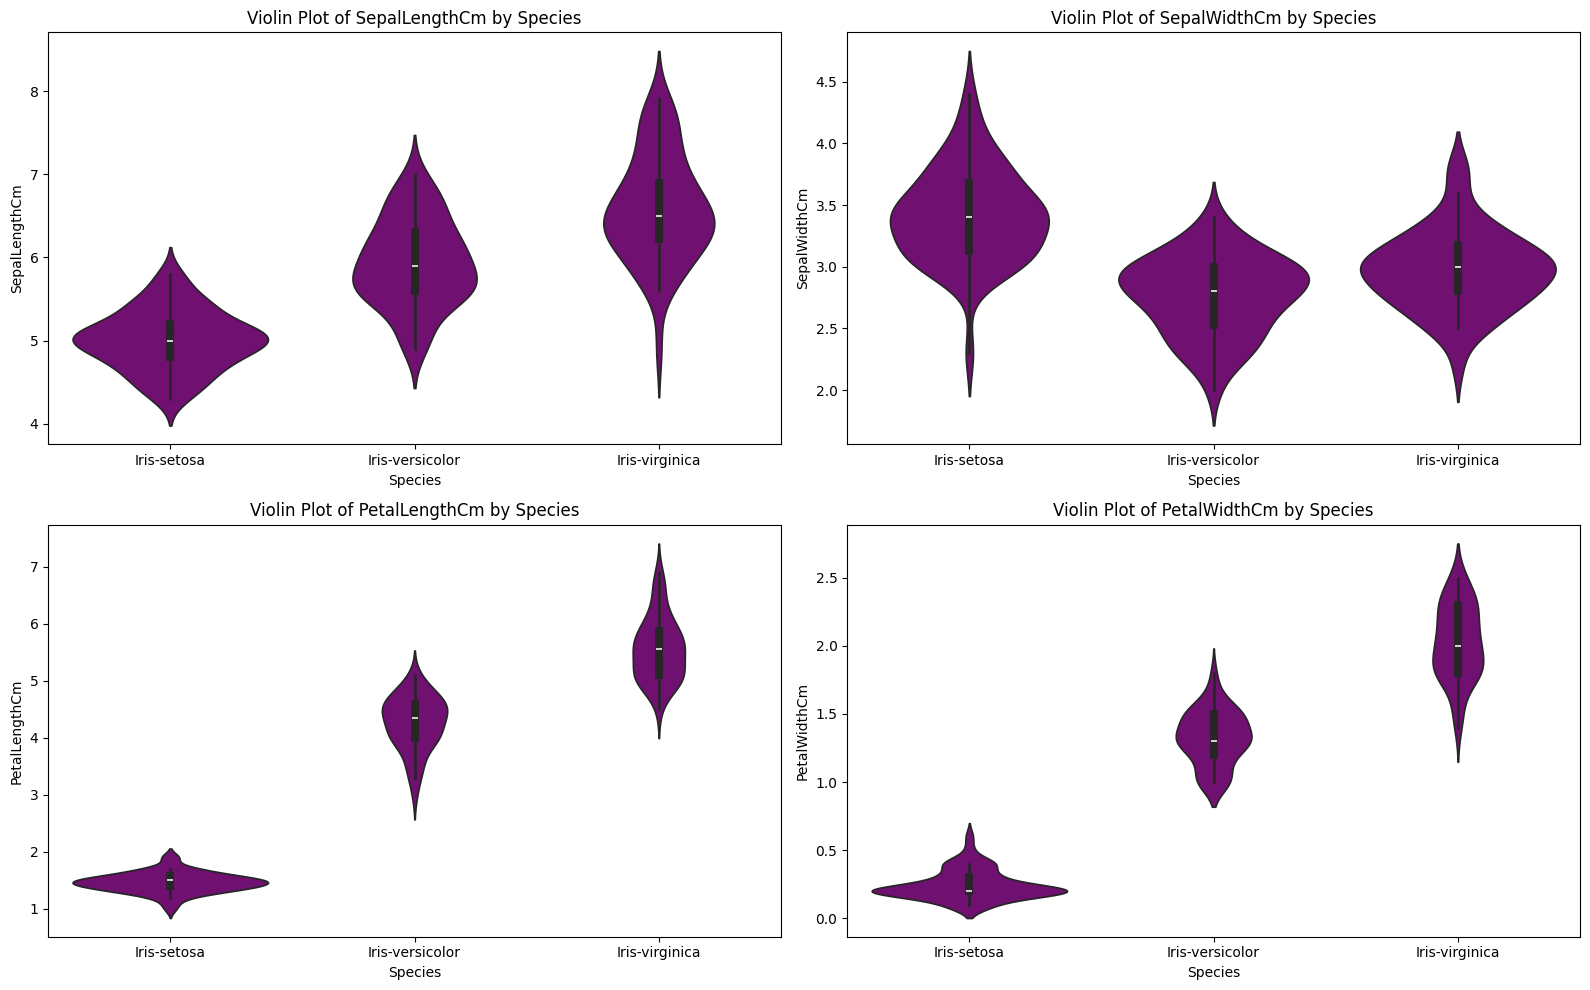

In [12]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Species', y=feature, data=df, color = 'purple')
    plt.title(f'Violin Plot of {feature} by Species')

plt.tight_layout()
plt.show()

#**Visual Analysis**
*By using violin plots to visualize the distributions of Sepal Length, Sepal Width, Petal Length, and Petal Width for each species, we can gain insights into the variability and overlap of these features. This visualization helps us understand how closely the dataset captures the actual shapes and sizes of the flower petals and sepals across different species.

#**Training Model to do classification/Prediction of the Iris Species based on their features**

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,W,test_size=0.20,random_state=42)

In [14]:
# Standardize the features to minimize the numeric difference between attributes which will help in training model more precisely
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#training model
#using logistic regression as we want to do features based binary classification
Iris_model = LogisticRegression(random_state=42)
Iris_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#**Prediction**

In [16]:
y_pred = Iris_model.predict(X_test)
Ir_pred = pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
Ir_pred.head()

,Actual,Predictions
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


#**Accuracy**

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100} %')

Accuracy: 100.0 %


#**Summary**

*First, I performed data cleaning and visual analysis. After that, I trained a logistic regression model on the cleaned data. Finally, I conducted prediction and accuracy tests to evaluate the model's performance.*